# Assignment 1

Hacettepe University 
Computer Science


BBM 409: Introduction to Machine Learning Lab.

Student Name Surname: Didem Yanıktepe

Student ID: 21527563

Instructor: Aykut Erdem

TA: Necva Bolucu

## Part I: Theory Questions

### k-Nearest Neighbor Classification

1) 

    a. Given 1-NN(S1) and 1-NN(S2) the label of point x is positive. We find 1-nn with this formula.
<img src="1.png" alt="Drawing" style="width: 500px;"/>

    So in 1-NN(S1) the minumum distance is posivite and 1-NN(S2) is positive too. If we union them we have 2  positive labels and one of them is closer. So x is positive in our sample.

    b. We have 3 neighbors for each sample. In 3-NN(S1) = {+,-,+} 3-NN = {+,+,-} by the way negative ones are closer.So if we union them we have 3-NN(S1US2) = {-,-,+,+,+,+}. If we chose the closest three point our sample will be 3-NN(S3) = {-,-,+}. Then it will be negative.


2)

    a. A point can be its own neighbor. So, k = 0 minimizes the training set error. The error is 0.
    b. k = 5 or k = 7 minimizes the leave-one-out cross-validation error. The error is 4/14.
    c.Too big k (k = 13) misclassifies every datapoint (using leave one out cross validation). Too small k leads to overfitting.

<img src="2.png" alt="Drawing" style="width: 500px;"/>


### Linear Regression

    1)  y = 23x1 
        X = 23x6(adding bias)
        θ = 6x1
    
    2) Since the closed form can be slow, I prefer the Gradient descent. And we'll go out of 200,000-dimensional matrix will be too big. The process will be slower for the closed form.

    3) It accelerates the gradient descent, allowing for less repetition to achieve a good solution. Feature scaling accelerates the gradient descent by avoiding additional iterations that are required when one or more properties take much greater values than others.
   
   

## PART II: Book Recommendation System
   
        I implemented a nearest neighbor algorithm to recommend books to readers to their ratings. In addition,recommend books to a user based on user-item ratings.KNN algorithm finds sets of similar users based on common book ratings and make predictions using the average rating of top-k nearest neighborsand also implementation as weighted k-NN algorithm.


### Collaborative Filtering
        User-based algorithm is a simple algorithmic interpretation of the basic premise of collaborative filtering: past ratings and find other users that are similar to the current user and use ratings with other items to predict what the current user will look like. To estimate the preference for an item that my user does not rate, the user-friendly CF looks for other users who deal with my user with items that they both rate. For that item, these users ' ratings are then weighted by my user's ratings and agreement levels to predict my user's rating.
       

### Datasets

        First i read the csv files with pandas library. I use two library for this assignment : numpy and panda(impoting matplotlib for visulate the datas).Here is my reading csv files code. I delete "Image-Url-S" etc Exploring each of these datasets one by one and beginning with books dataset, we can see that image URLs columns do not seem to be required for analysis, and hence these can be dropped off. I filtered the "BX-Users.csv" on canada and usa users.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

book = pd.read_csv("BX-Books.csv",sep=";",error_bad_lines=False,encoding='latin-1')
book.columns = ["ISBN","Book-Title","Book-Author","Year-Of-Publication","Publisher","Image-URL-S","Image-URL-M","Image-URL-L"]

del book["Image-URL-S"]
del book["Image-URL-M"]
del book["Image-URL-L"]

user = pd.read_csv("BX-Users.csv",sep=";",error_bad_lines=False,encoding='latin-1')
user.columns = ("UserID","Location","Age")
user = user[user['Location'].str.contains("usa|canada")]


ratingforfind = pd.read_csv("train-sklearn.csv",sep=";",error_bad_lines=False,encoding='latin-1')
ratingforfind.columns = ("indexes","UserID","ISBN","BookRating")
del ratingforfind["indexes"]



b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/Users/didemyaniktepe/anaconda3/lib/python3.7/site-packages/IPython/core/i

In [5]:
ratingforfind.head()

,UserID,ISBN,BookRating
0,4017,006000438X,10
1,76483,1557100160,9
2,36135,014025448X,8
3,132679,1853260274,10
4,129099,1556611536,9


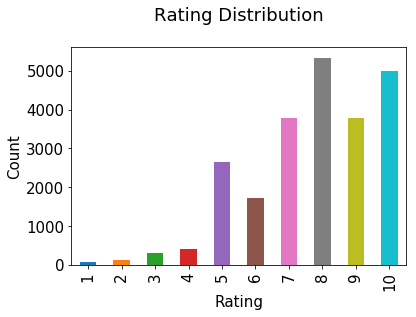

In [7]:
plt.rc("font", size=15)
ratingforfind.BookRating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

        Some books are not rated, some users dont rate the book. So i will merge three csv file book and ratingforfind based on "ISBN"; user and ratingforfind based on "UserID".  First identify other users similar to the current user in terms of their ratings on the same set of books. For example, if you liked all the “Lord of the rings” books, you identify users which also liked those books. If you found those similar users you take their average rating of books the current user has not yet read … So, how did those “Lord of the rings” lovers rate other books? Maybe they rated “The Hobbit” very high. … and recommend those books with the highest average rating to him.Accordingly, “The Hobbit” has a high average rating and might be recommended to you. These three steps can easily be translated into an alogrithm.However, before we can do that we have to restructure our data. For collaborative filtering data are usually structured that each row corresponds to a user and each column corresponds to a book. This could for example look like this, for 3 users and 5 books. Note that not every user rated every book. For example, user 1 only rated book 3, while user 2 rated book 1 and book 2.

Then i made a pivot table which coloums are Books, rows are User ID values are ratings.It takes a long time because of matrix lenght. It is a huge pivot table so taking too much time. I  filled "-1" because some users rate some books 0. If i fill with 0 i could not find the user who rated 0.

In [8]:
rating = pd.merge(book,ratingforfind,on="ISBN")
rating = pd.merge(rating,user,on="UserID")
rating = rating[rating.BookRating != 0]


ratingpivot = rating.pivot_table(index='UserID', columns='ISBN', values='BookRating',fill_value=-1)

In [9]:
ratingpivot.tail()

ISBN,000104799X,000647425X,000648199X,000648302X,000649840X,000651202X,000654861X,000671675X,000673765X,000712032X,...,B0000633PU,B00007MF56,B00008RWPV,B0000AA9JB,B0000AZW79,B0000C2W5U,B0000T6KHI,B0001FZGBC,B0001I1KOG,B000234N3A
UserID,,,,,,,,,,,,,,,,,,,,,
278832,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
278843,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
278844,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
278851,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
278854,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


#### Step 1: Find similar users with similarities

     For this step i select users that have in common that they rated the same books. I choose the one user ond one book on train rating set i delete it in Train Data set which is leave one out cross validation firstly.And i took the users who rated same book.For these users, i calculated the similarity of their ratings with me my user ratings. There is a number of options to calculate similarity, adjusted cosine similarity. Typically they are used. Here, I chose pearson’s correlation. I would go through all the selected users and calculate the similarity between their and my user's ratings. I looked the similarities cosine similarity and the others. The best one is pearson’s correlation so i choose it. And i found all neighbours with their similarities.

#### Cosine Similarity : 

<img src="3.png" alt="Drawing" style="width: 500px;"/>

####  Adjusted Cosine Similarity:
<img src="4.png" alt="Drawing" style="width: 500px;"/>

#### Pearson Correlation Similarity:
<img src="5.png" alt="Drawing" style="width: 500px;"/>

In [10]:
#find users who rate the book
def findusersratebook(all_rates,user_matrix,location):
    users_rated_book_indexs = list()

    count = -1
    for x in all_rates:
        count += 1
        if (x[location] != -1):
            users_rated_book_indexs.append(count)

    dict_index = {}

    for i in range(len(users_rated_book_indexs)):
        dict_index[user_matrix[users_rated_book_indexs[i]]] = all_rates[users_rated_book_indexs[i]]

    return  dict_index


def pearsoncorrelation(object1,traindata):
    object1 = object1.clip(0)

    allvalues = dict()
    for key,object2 in traindata.items():
        object2 = object2.clip(0)
        result1 = np.corrcoef(object1,object2)[0,1]
        if(np.isfinite(result1)):
            allvalues[result1]=key


    mylist = list(allvalues.keys())
    myother = sorted(mylist,reverse=True)
    knn = dict()
    neighbours = list()
    k = 0
    for i in allvalues:
        knn[allvalues[myother[k]]] = myother[k]
        neighbours.append(allvalues[myother[k]])
        k+=1

    return neighbours


def cosinesimilarity(a,traindata):

    a = a.clip(0)
    similarity_key = dict()
    for key,b in traindata.items():
        b = b.clip(0)
        dot_product = np.dot(a, b)
        norm_a = np.linalg.norm(a)
        norm_b = np.linalg.norm(b)
        result1= dot_product / (norm_a * norm_b)
        if(result1 != 0):
            similarity_key[key]=result1

    sorted_neigbours = sorted(similarity_key.items(), key=lambda x: x[1])
    neighbours = list()
    reversed(sorted_neigbours)

    for i,v in sorted_neigbours:
        if(np.isfinite(v)):
            print(i,v)
            neighbours.append(i)
    neighbours = reversed(neighbours)
    return neighbours


def cosinesimilarity1(a,traindata):

    a = a.clip(0)
    
    for key,b in traindata.items():
        b = b.clip(0)
        first = np.norm(a)
        second = np.norm(b)
        product = np.dot(a, b)
        result1 = product / (first * second)

    return result1


def adjustedCosineMatrix(a,traindata):

    users = traindata.index.size
    books = traindata.colums.size

    similar = np.zeros((users, books))
    avarage = np.array(users)

    for i in range(books):
        for j in range(i, book):
            similar[i][j] = cosinesimilarity1(traindata[:i] - avarage,traindata[:j] - avarage)
    return similar


### Step 2: Find k-nn and weighted k-nn 
    
#### K Nearest Neighbor:
    
    I found similarities on users now i found how many user i should choose. First i started 3 user then i measure the difference between real ratings and predicted ratings then 5,7,9. The best predicted was 3. 
<img src="8.png" alt="Drawing" style="width: 500px;"/>


    Some exprement result:
    
    k=3
    knn :  7.0 weight :  6.999134199350537 real prediction:  7
    knn :  9.5 weight :  9.49995420127028 real prediction:  8
    knn :  8.0 weight :  7.996904034659469 real prediction:  4
    knn :  6.5 weight :  6.499080883388205 real prediction:  4
    knn :  7.0 weight :  6.996723999653885 real prediction:  9
    knn :  7.5 weight :  7.4988095260590955 real prediction:  4
    knn :  8.0 weight :  7.995535721700078 real prediction:  7
    knn :  5.0 weight :  10.0 real prediction:  10
    knn :  8.0 weight :  7.999884366327989 real prediction:  10
    knn :  4.5 weight :  9.0 real prediction:  8
    knn :  9.5 weight :  9.50041956235842 real prediction:  9
    knn :  8.5 weight :  8.49500016666 real prediction:  7
    knn :  9.5 weight :  9.496592940386892 real prediction:  10
    knn :  4.0 weight :  8.0 real prediction:  9
    knn :  8.0 weight :  7.998968067360278 real prediction:  9
    
    k=5
    knn :  7.8 weight :  7.798307603698272 real prediction:  7
    knn :  8.6 weight :  8.600388093368313 real prediction:  8
    knn :  7.2 weight :  7.194305511070164 real prediction:  4
    knn :  7.0 weight :  6.998601590775316 real prediction:  4
    knn :  7.4 weight :  7.398006879322595 real prediction:  9
    knn :  8.0 weight :  7.9888117638257 real prediction:  4
    knn :  8.0 weight :  7.997769231724429 real prediction:  7
    knn :  2.0 weight :  10.0 real prediction:  10
    knn :  7.4 weight :  7.399805029063916 real prediction:  10
    knn :  1.8 weight :  9.0 real prediction:  8
    knn :  8.8 weight :  8.797899633747603 real prediction:  9
    

In [7]:
def knn(user_and_rates_matrix,neighbourlist,location):

    rating_predictionknn = 0
    k_number = 0

    for i in neighbourlist:
        if(k_number<5):
            k_number+=1
            rating_predictionknn= rating_predictionknn + user_and_rates_matrix.get(i)[location]


    return rating_predictionknn/5

#### Weighted K Nearest Neighbor:
        Differences between weighted knn and knn : we include the weights and we divide it with weights.We add weight because some users more similar than the other users. So if we added we weight them our prediction will be good. I searched how can i choose the weights. Firstly i choose similarities but unfortunately in pearson correlation can be negative, in cosine similarity can be zero. So i choose the distance because it can not be negative. A decaying exponential of the form e−αx where x x is the distance from the observation) is convenient in this situation. It has the nice feature that the weight is equal to 1 when the observation lies exactly at one of your training points and decays to zero as x→∞ . I choose Manathan Distance. 

In [8]:
def weightedknn(location,user,neigbours,user_and_rates_matrix):
    weighted_rating_predict = 0
    a = len(user)
    user = user.clip(0)
    distance = list()

    m = 0
    for x in neigbours:
        if(m<5):
            m+=1
            y = user_and_rates_matrix.get(x)
            y = y.clip(0)
            suma = manathan_distance(user,y)
            distance.append(suma)



    k_number = 0
    total_distance = 0

    for i in neigbours:
        if (k_number < 5):
            weighted_rating_predict = weighted_rating_predict + (math.exp((1/distance[k_number])) * user_and_rates_matrix.get(i)[location])
            total_distance = total_distance + (math.exp(1/distance[k_number]))
            k_number += 1


    return weighted_rating_predict/total_distance


def manhattan_distance(first, second):
    return sum([abs(first[i]-second[i]) for i in range(len(first))])


        The mean absolute error calculates an accuracy . MAE measures the predictions made by knn are compared to actual ratings. If {r1,...,rN} are all the real values in the target set, and {p1,.,pN} are the predicted values for the same ratings, and E = {ε1,...,εN} = {p1 − r1,...,pN − rN} are the errors. The smallest the mean absolute error, the more accurate .

<img src="6.png" alt="Drawing" style="width: 200px;"/>

        Finally Mean Absolute Error in this part i do cross validation on my dataset. I splited the data (4/5)train and (1/5) validation.I did it with sklearn library and my code.As there is never enough data to train your model, removing a part of it for validation poses a problem of underfitting. By reducing the training data, we risk losing important patterns/ trends in data set, which in turn increases error induced by bias. So, what we require is a method that provides ample data for training the model and also leaves ample data for validation. K Fold cross validation does exactly that. To make it randomly very hard on code for me so i want to see it with this library just made myself sure.In this assignment Handling with huge dataset is hard to me because i waited for the running my code a while so just try i filtered my data then i tried to large datesets. Here is my filtering code and mean absolute code. For mean absoluate code i used numpy library.

<img src="7.png" alt="Drawing" style="width: 500px;"/>

In [13]:
counts = ratingforfind["UserID"].value_counts()
ratingforfind = ratingforfind[ratingforfind["UserID"].isin(counts[counts>=5].index)]
counts1 = ratingforfind["BookRating"].value_counts()
ratingforfind = ratingforfind[ratingforfind["BookRating"].isin(counts1[counts1>=5].index)]
#i deleted it after just for see the data clearly.

def MAE(real_values, predicted_values):
    return np.abs(real_values - predicted_values).mean()

### Conculision
        
        A Nearest Neighbor Algoritm is implemented to produce recommendations between users such that similar users who rated the same book were considered.Both Weighted knn and knn were used and evaluations carried out on each.
        The first problem is sparsity. In reality, most users do not rate most items hence the probability of finding a set of users with similar ratings is usually low . The second problem is zeros. This is where an item cannot be predicted rating unless a user has rated before. To overcome these potential problems in real-world systems, future work could include research into exploiting content information of items already rated and combining it.